# Sentinel-1 

We want to use Sentinel-1 radar images to detect barges and ships when there is cloud coverage on the Planet Labs satellite imagery.

In [1]:
from sentinelhub import SHConfig
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, DataCollection

# You must get instance_id, sh_client_id, and sh_client_secret (see documentation)

config = SHConfig()

config

SHConfig(
  instance_id='2a5bbc89-d50a-416f-84cb-417ed082b2c0',
  sh_client_id='f6e48f2e-8c41-48a8-b6db-260cc244cc57',
  sh_client_secret='Ml>,wUNj5C9[p(6Y<Ld28vkWRs/*%]M{B4{i68Wr',
  sh_base_url='https://services.sentinel-hub.com',
  geopedia_wms_url='https://service.geopedia.world',
  geopedia_rest_url='https://www.geopedia.world/rest',
  aws_access_key_id='',
  aws_secret_access_key='',
  aws_metadata_url='https://roda.sentinel-hub.com',
  aws_s3_l1c_bucket='sentinel-s2-l1c',
  aws_s3_l2a_bucket='sentinel-s2-l2a',
  opensearch_url='http://opensearch.sentinel-hub.com/resto/api/collections/Sentinel2',
  max_wfs_records_per_query=100,
  max_opensearch_records_per_query=500,
  max_download_attempts=4,
  download_sleep_time=5,
  download_timeout_seconds=120,
  number_of_download_processes=1
)

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt

from sentinelhub import MimeType, CRS, BBox, SentinelHubRequest, SentinelHubDownloadClient, \
    DataCollection, bbox_to_dimensions, DownloadRequest

# from utils import plot_image


"""
Utilities used by example notebooks
"""
import matplotlib.pyplot as plt
import numpy as np


def plot_image(image, factor=1.0, clip_range = None, **kwargs):
    """
    Utility function for plotting RGB images.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

In [4]:
print('Supported DataCollections:\n')
for collection in DataCollection.get_available_collections():
    print(collection)

DataCollection.SENTINEL1

Supported DataCollections:

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT8
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR


<DataCollection.SENTINEL1: DataCollectionDefinition(
  api_id: S1GRD
  catalog_id: sentinel-1-grd
  wfs_id: DSS3
  collection_type: Sentinel-1
  sensor_type: C-SAR
  processing_level: GRD
  orbit_direction: BOTH
  is_timeless: False
  has_cloud_coverage: False
)>

In [5]:
# evalscript = """
#     //VERSION=3

#     function setup() {
#         return {
#             input: ["VV"],
#             output: { 
#                 id:"default", 
#                 bands: 1
#             }
#         }
#     }
#     function evaluatePixel(samples) {
#         return [2 * samples.VV]
#     }
# """

# request_true_color = SentinelHubRequest(
#     evalscript=evalscript,
#     input_data=[
#         SentinelHubRequest.input_data(
#             data_collection=DataCollection.SENTINEL1_IW_DES,
#             time_interval=('2020-06-12', '2020-06-13'),
#         )
#     ],
#     responses=[
#         SentinelHubRequest.output_response('default', MimeType.PNG)
#     ],
#     bbox=betsiboka_bbox,
#     size=betsiboka_size,
#     config=config
# )

# # plot_image(request_true_color.get_data()[0], factor=3.5/255, clip_range=(0,1))
# # plot_image(request_true_color.get_data()[0], factor=1.0)
# plot_image(request_true_color.get_data()[0], factor=1.0, cmap=plt.cm.Greys_r, vmin=0, vmax=120)


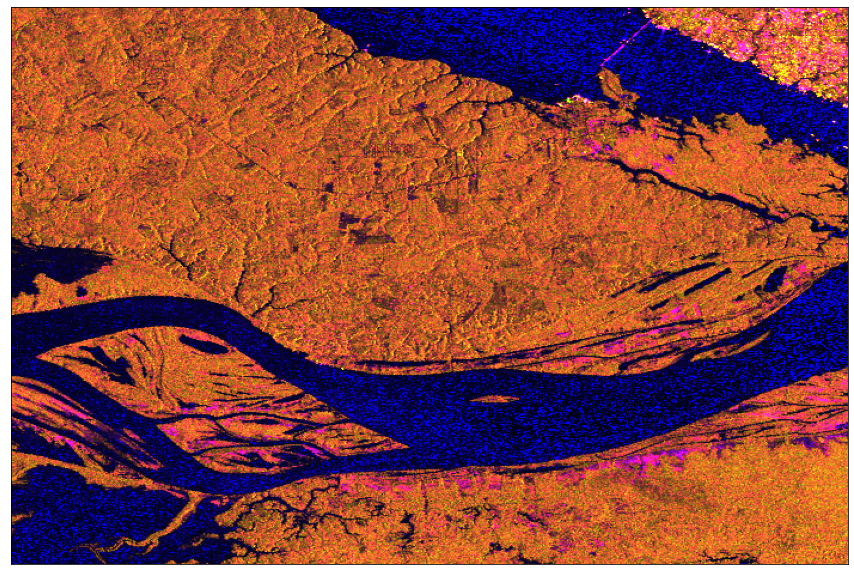

In [6]:
glacier_bbox = BBox([-60.3, -3.4, -60.3+.3, -3.4+.3], crs=CRS.WGS84)
glacier_size = (700, 466)


evalscript = """
    //VERSION=3

    return [VV, 2 * VH, VV / VH / 100.0, dataMask]
"""

time_interval = '2021-04-08', '2021-04-13'

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL1_IW_DES,
            time_interval=time_interval,
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=glacier_bbox,
    size=glacier_size,
    config=config
)

image = request.get_data()[0]

plot_image(image, factor=3.5/255, clip_range=(0,1))